<a href="https://colab.research.google.com/github/QwertyJacob/colab_handouts_PSI/blob/main/conteggio_2509.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Calcolo delle probabilità degli eventi attraverso il conteggio dei risultati
___________


Se si può calcolare la probabilità di ogni singolo esito in un evento $\mathcal{F}$, calcolare la probabilità dell'evento è semplice.

Gli esiti sono eventi disgiunti, quindi è sufficiente sommare le probabilità.

> Un caso comune, e particolarmente utile, si verifica **quando si sà che ogni risultato nello spazio campionario ha la stessa probabilità.** **In questo caso, calcolare la probabilità di un evento è un esercizio di conteggio.**

È possibile mostrare infatti che, nel caso di _eventi equiprobabili_, abbiamo:


$$ P(\mathcal{F}) = \frac{\text{Numero di esiti in  } \mathcal{F} }{\text{Numero di esiti in}\hspace{5pt} \Omega}$$



> **Esempio**: (Numeri dispari con dadi equi) Lanciamo un dado equo (ogni numero ha la stessa probabilità) due volte, poi sommiamo i due numeri. Qual è la probabilità di ottenere un numero dispari?

*Soluzione*
Ci sono $36$ esiti (parliamo di come cadono i dadi, non del numero che sommano i due dadi). Ognuno degli esiti ha la stessa probabilità (\frac{1}{36}).

In diciotto di essi, quando sommiamo, otteniamo un numero dispari e gli altri diciotto danno un numero pari. Quindi la probabilità è $\frac{18}{36}= 0.5$

Il seguente codice Python genera tutte le probabilità per ogni risultato possibile.

Nota: Riesci a capire dov'è che questo codice non è ottimizzato?

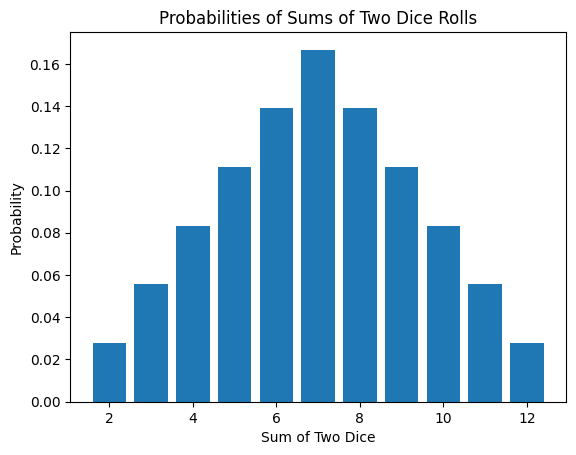

In [ ]:

import matplotlib.pyplot as plt

def dice_sum_probabilities():
  """Generates a plot of the probabilities of sums of two dice rolls."""

  possible_sums = list(range(2, 13))
  probabilities = []

  for total in possible_sums:
    count = 0

    for die1 in range(1, 7):
      for die2 in range(1, 7):
        if die1 + die2 == total:
          count += 1

    probabilities.append(count / 36)

  plt.bar(possible_sums, probabilities)
  plt.xlabel("Sum of Two Dice")
  plt.ylabel("Probability")
  plt.title("Probabilities of Sums of Two Dice Rolls")
  plt.show()

dice_sum_probabilities()

L'esercizio precedente si poteva risolvere facendo i conti in modo bruttale:

In [ ]:
possible_sums = list(range(2, 13))
probability_of_pair_result = 0

for total in possible_sums:
  count = 0
  if total % 2 == 0:
    for die1 in range(1, 7):
      for die2 in range(1, 7):
        if die1 + die2 == total:
          count += 1

  probability_of_pair_result += count / 36

print(probability_of_pair_result)

0.5


> **Esempio**: (Numeri divisibili per cinque con dadi equi) Lanciamo due volte un dado equo a sei facce, poi sommiamo i due numeri. Qual è la probabilità di ottenere un numero divisibile per cinque?

**Soluzione** Ci sono 36 risultati. Ognuno di essi ha la stessa probabilità $\frac{1}{36}$. Per questo evento, i punti devono sommare o 5
o 10. Ci sono 4 modi per ottenere 5. Ci sono 3 modi per ottenere 10, quindi la probabilità è $\frac{7}{36}$.

In [ ]:
7/36

0.19444444444444445

In [ ]:
def probability_divisible_by_five():

  favorable_outcomes = 0
  total_outcomes = 36

  for die1 in range(1, 7):
    for die2 in range(1, 7):
      if (die1 + die2) % 5 == 0:
        favorable_outcomes += 1

  probability = favorable_outcomes / total_outcomes
  return probability

probability = probability_divisible_by_five()
print(f"The probability of obtaining a number divisible by 5 is: {probability}")

The probability of obtaining a number divisible by 5 is: 0.19444444444444445


> **Esempio:** Una coppia decide di avere dei figli. Decidono semplicemente di avere tre figli. Si supponga che si verifichino tre nascite, che da ogni nascita nasca un bambino unicamente, e che i maschi e le femmine abbiano la stessa probabilità ad ogni nascita. Sia $\mathcal{B}_i$ è l'evento in cui ci sono $i$ bambini e $\mathcal{C}$ è l'evento in cui ci sono più bambine che bambini. Calcolare $P(\mathcal{B}_1)$ e $P(\mathcal{C})$.

*Soluzione*

Ci sono otto esiti. Ognuno di essi ha la stessa probabilità. Tre di essi hanno un solo ragazzo, quindi $P(\mathcal{B}_1)=\frac38$, mentre quattro di questi esiti hanno più ragazze che ragazzi, quindi $P(\mathcal{C})=\frac12$.

#### Nota (Opzionale): 

Vedremo più avanti nel corso che esiste un _Procedimento matematico_ per calcolare queste probabilità.

Impareremo a modellare questi fenomeni tramite _variabili aleatorie_, che non sono altro che degli oggetti che rappresentano gli esiti di un esperimento, ma che tornano molto utili quando gli esiti non sono equiprobabili. 

Una variabile aleatoria definisce quindi una _distribuzione di probabilità_ particolare sugli esiti dello spazio campione, essendo questa distribuzione comunemente formalizzata dentro una famiglia di funzioni. Capiremo tutto questo in dettaglio più avanti, per ora ci basti sapere che questo esercizio, per esempio, si poteva risolvere con una _distribuzione Binomiale_, che si usa per assegnare delle probabilità agli esiti di una successione di esperimenti che prevedono due soli esiti ad ogni iterazioni, chiamati _successo_ e _insuccesso_ in letteratura, quando le probabilità di questi eventi sono fisse nel tempo. (Questo tipo di successioni di esperimenti si chiama processo di Bernoulli, lo vedremo più avanti.) 

Con questa breve introduzione, possiamo leggere, se siamo curiosi e impazienti, come si sarebbe potuto risolvere l'esercizio usando la v.a. Binomiale.

Possiamo procedere tramite *processo di Bernoulli*. Andiamo a considerare la probabilità di successo $p$ e la probabilità di fallimento $1-p$. Andiamo a considerare come fallimento $1-p$, la nascita di un maschio $M$, e come successo $p$, la nascita di una femmina $F$. Essendo il numero massimo di nascite 3, $F$ $\ge$ $M$ solo se $F$ = 2 oppure 3 (solo femmine).
A questo punto, è facile andare a calcolare la probabilità di avere più femmine che maschi.

$$
p(F) = p(F=2) + p(F=3) = \binom{3}{2} \cdot \Big(\frac{1}{2}\Big)^2 \cdot \Big(1-\frac{1}{2}\Big)^{3-2} + \binom{3}{2} \cdot \Big(\frac{1}{2}\Big)^3 \cdot \Big(1-\frac{1}{2}\Big)^{3-3} = 3 \cdot \frac{1}{8} + 1 \cdot \frac{1}{8} = \frac{1}{2}
$$

La formula matematica di base che abbiamo usato è la seguente, e corrisponde alla distribuzione Binomiale:

$$
P(F=k) = \binom{n}{k} \cdot p^k \cdot (1-p)^{n-k}
$$

Dove $p$ è la probabilità dell'evento. Nel nostro caso, $\frac{1}{2}$ in quanto abbiamo 0.5 probabilità di ottenere maschio o femmina. $k$ indica l'esito desiderato, nel nostro caso ($k$ = 2, 2 femmine). E $n$ corrisponde al numero totale di iterazioni effettuate, nel nostro caso 3 (il numero di figli che la coppia decide di avere).

Seguendo lo stesso ragionamento, possiamo calcolare la probabilità di ottenere un solo figlio maschio:

$$
p(M) = \binom{3}{1} \cdot \Big(\frac{1}{2}\Big)^1 \cdot \Big(1-\frac{1}{2}\Big)^2 = 3 \cdot \frac{1}{8} = \frac{3}{8}
$$

### Continuazione:

In [ ]:
import itertools

possible_outcomes = list(itertools.product(['B', 'G'], repeat=3))

print("All possible outcomes:")
for idx, outcome in enumerate(possible_outcomes):
    print(idx+1, outcome)

num_outcomes = len(possible_outcomes)
print(f"Number of possible outcomes: {num_outcomes}")

All possible outcomes:
1 ('B', 'B', 'B')
2 ('B', 'B', 'G')
3 ('B', 'G', 'B')
4 ('B', 'G', 'G')
5 ('G', 'B', 'B')
6 ('G', 'B', 'G')
7 ('G', 'G', 'B')
8 ('G', 'G', 'G')
Number of possible outcomes: 8


In [ ]:
num_boys_1 = 0
num_more_girls = 0

print("Possible outcomes with one boy:")

for outcome in possible_outcomes:
  num_boys = outcome.count('B')
  if num_boys == 1:
    num_boys_1 += 1
    print(num_boys_1, outcome)

print("Possible outcomes with more girls than boys:")
for outcome in possible_outcomes:
  if outcome.count('G') > outcome.count('B'):
    num_more_girls += 1
    print(num_more_girls, outcome)

Possible outcomes with one boy:
1 ('B', 'G', 'G')
2 ('G', 'B', 'G')
3 ('G', 'G', 'B')
Possible outcomes with more girls than boys:
1 ('B', 'G', 'G')
2 ('G', 'B', 'G')
3 ('G', 'G', 'B')
4 ('G', 'G', 'G')


In [ ]:
probability_boys_1 = num_boys_1 / num_outcomes
probability_more_girls = num_more_girls / num_outcomes

print(f"P(B_1) = {probability_boys_1}")
print(f"P(C) = {probability_more_girls}")

P(B_1) = 0.375
P(C) = 0.5


> A volte, manipolando un po' lo spazio dei risultati, è possibile calcolare facilmente ciò che si desidera:

> **Esempio**: Una coppia decide di avere figli. Decidono di avere figli finché non nasce la prima bambina, o finché non ne nascono tre, e poi di fermarsi. Supponiamo che ogni nascita dia luogo a un solo bimbo e che i maschi e le femmine abbiano la stessa probabilità di nascere. Sia $\mathcal{B}_i$ l'evento in cui ci sono $i$ maschi e $\mathcal{C}$ l'evento in cui ci sono più femmine che maschi. Calcolare $P(\mathcal{B}_1)$ e $P(\mathcal{C})$


*Soluzione*.  In questo caso, potremmo scrivere gli esiti possibili come $\Omega = \{G; BG; BBG\}$, ma se li consideriamo in questo modo, non abbiamo un modo semplice per calcolare la loro probabilità!

Potremmo invece utilizzare lo spazio campionario della risposta precedente (e cioè quello fatto da 8 possibili combinazioni), ma ipotizzare *che alcune delle nascite successive siano fittizie.* In questo modo si ottiene un insieme naturale di eventi per i quali è facile calcolare le probabilità. (Ogni una delle 8 combinazioni ha la stessa probabilità).

Avere una bambina corrisponderebbe all'evento $\{Gbb; Gbg; Ggb; Ggg\}$, dove abbiamo usato lettere minuscole per scrivere le nascite successive fittizie. Dato che sono 4 possibili combinazioni su 8 che generano questa casistica, la probabilità è $\frac12$. Avere un maschio e poi una femmina corrisponderebbe all'evento $\{BGb; BGgg\}$ (e quindi ha probabilità $\frac14$). Avere due maschi e poi una femmina corrisponderebbe all'evento $\{BBG\}$ (e quindi ha probabilità $\frac18$).
Infine, avere tre maschi corrisponde all'evento $\{BBB\}$ (e quindi ha probabilità $\frac18$). Ciò significa che $P(\mathcal{B}_1) = \frac14$ e $P(\mathcal{C})=\frac12$.

## Permutazioni e disposizioni: quando "l'ordine conta".

______________

Il conteggio degli esiti di un evento può richiedere argomenti combinatori piuttosto elaborati. Una forma di argomentazione
particolarmente importante è quella di ragionare sulle **permutazioni** e sulle **combinazioni**. Si ricorda che il numero di permutazioni distinte di N elementi è $n!$

> **Permutazioni**: Quando abbiamo N elementi distinti e vogliamo *ordinarli* *in tutti i modi possibili*, stiamo calcolando le **permutazioni**. Il risultato è $n!$.

> Esempio: Si estrae una mano di sette carte da un mazzo di carte standard correttamente mescolato. Con quale probabilità vengono estratte le carte 2,3,4,...,8 di cuori (in quell'ordine)?

*Soluzione* Useremo le permutazioni per risolvere questo esericizion. Esistono $52!$ ordinamenti diversi di un mazzo di carte opportunamente mescolato. Questo è il numero totale degli esiti possibili (cioè la cardinalità dello spazio campione). Il numero di esiti dell'evento in questione invece si ottiene notando che che ogni risultato nell'evento è un ordine di carte in cui tra le prime sette carte si trova la sequenza 2,3,4,...,7,8, in quell'ordine.

Ci sono quindi 45 esiti nell'evento, perché è possibile riordinare le 45 carte rimanenti in modo arbitrario. Ciò significa che la
probabilità è:

$$ \frac{45!}{52!}$$

Di solito, quando vogliamo calcolare il numero di ordinamenti possibili di tutti gli $n$ elementi di un insieme, parliamo di permutazioni. Invece, quando volgiamo calcolare il numero di ordinamenti di un sottoinsieme di elementi, come nell'esercizio precedente, parliamo di disposizioni.

Per quello, la formula che ci aiuterà a calcolare il numero di ordinamenti di $k$ elementi presi da un insieme di $n$ elementi si dennota con $D_{n,k}$, ed è chiamata "*numero di disposizioni di classe $k$ di $n$ elementi diversi"*:

$$ D_{n,k} = \frac{n!}{(n-k)!} $$

Non ci confondiamo con le diciture. Parliamo di numero di disposizioni perché l'ordine conta. Teniamo in conto che, presi i $k$ elementi, ne rimangono $n-K$. Questo vuol dire che non stiamo reinserendo gli elementi che prendiamo.

Nell'esempio precedente, reinserire le carte ogni volta e remiscolare il mazzo di carte porterebbe ad un altra probabilità.

Quado parliamo di disposizioni di elementi senza reinserimento nell'insieme di partenza, parliamo di **disposizioni semplici**.


> Ricorda: se devi contare il numero di ordinamenti, cioè se "l'ordine conta" allora parliamo di disposizioni!!!

## Combinazioni: quando "l'ordine non conta"
__________

Il numero di *combinazioni* invece è diverso dal numero di ordinamenti. Contare il numero di combinazioni equivale a contare il numero di  sottoinsiemi di una certa dimensione che possono essere formati da un insieme più grande,** senza considerare l'ordine degli elementi all'interno di ciascun sottoinsieme.**
Per essere più precisi:

> **Definizione di combinazione:** Una combinazione è una *selezione* di $k$ elementi da un insieme di $n$ elementi, dove l'ordine non importa. Si indica comunemente con $C_{n,k}$ oppure $n \choose k$.

> Formula per le combinazioni: Il numero di combinazioni di $n$ elementi presi $k alla volta è dato da:

$$ C_{n,k} = \frac{n!}{(k! \cdot (n-k)!} $$

- Differenza con le permutazioni:

Le permutazioni considerano l'ordine (ABC è diverso da CBA). Le combinazioni non considerano l'ordine (ABC è lo stesso di CBA).


- Interpretazione:

Contare le combinazioni equivale a contare in quanti modi possiamo selezionare $k$ oggetti da un gruppo di $n$ oggetti, dove non ci interessa l'ordine in cui vengono selezionati.
È come rispondere alla domanda: "In quanti modi diversi posso formare un comitato di $k$ persone da un gruppo di n persone?"


- Connessione con i sottoinsiemi:

Ogni combinazione rappresenta un sottoinsieme di $k$ elementi dell'insieme originale di $n$ elementi. Il numero totale di sottoinsiemi di un insieme di $n$ elementi (inclusi l'insieme vuoto e l'insieme completo) è $2^n$, che è la somma di tutte le possibili combinazioni: $C_{n,0} + C_{n,1} + ... + C_{n,n}$.


- Relazione con il coefficiente binomiale:
Le combinazioni sono strettamente legate al coefficiente binomiale nello sviluppo del binomio di Newton, da cui deriva la notazione $n \choose k$.

> In sintesi, mentre le permutazioni contano tutti i possibili ordinamenti, le combinazioni contano i sottoinsiemi senza considerare l'ordine interno. Questo concetto è fondamentale in molte applicazioni, dalla teoria delle probabilità alla statistica, dalla teoria dei giochi alla crittografia.

> Trovi delle spiegazioni più "passo passo" sul sito di [YouMath](https://www.youmath.it/lezioni/probabilita/calcolo-combinatorio.html)